# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [469]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Input, Dropout, BatchNormalization
from xgboost import XGBClassifier

In [470]:
df = pd.read_csv('pollution_dataset.csv')
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [471]:
df_copy = df.copy()
df_copy['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [472]:
#classification problem

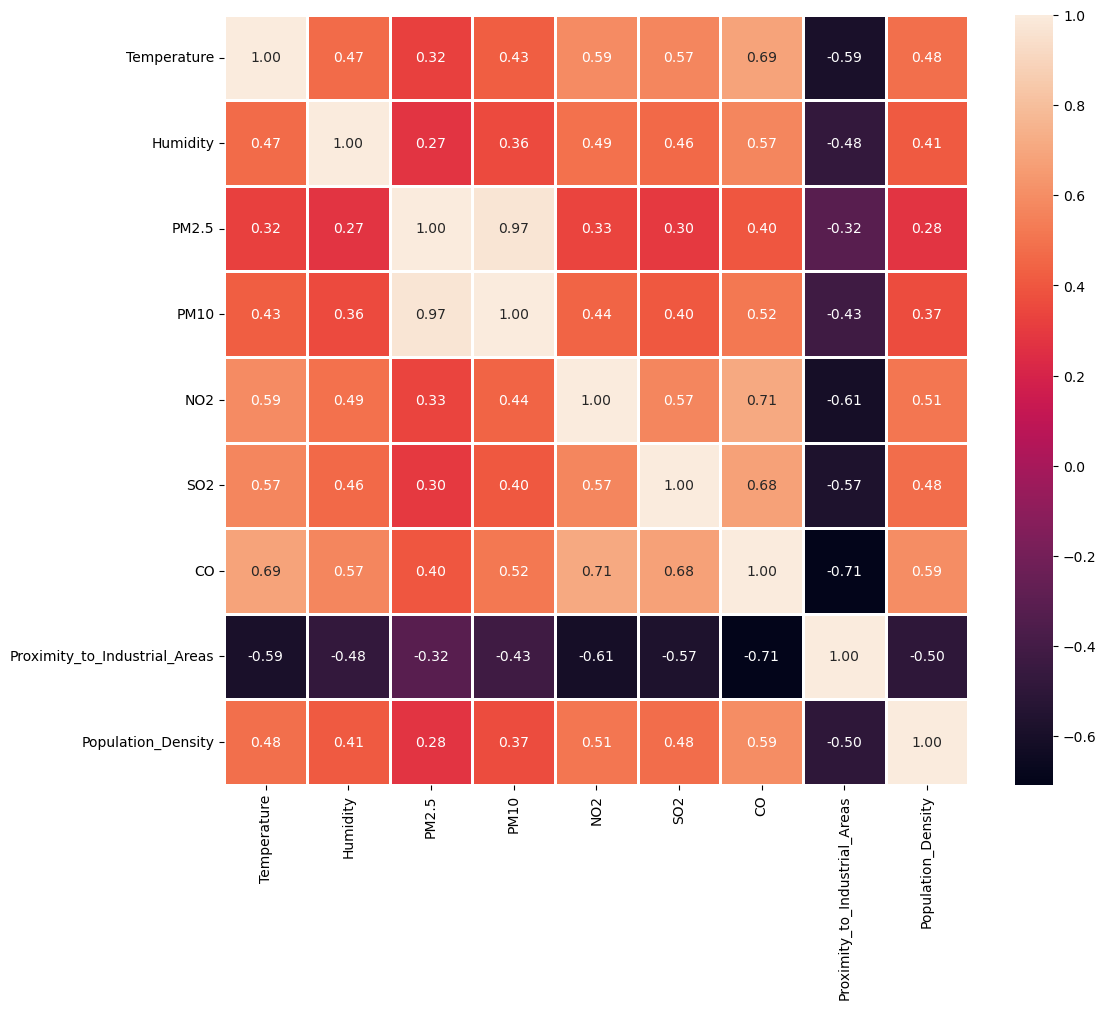

In [473]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('Air Quality', axis=1).corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

In [474]:
df_copy.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'PM2.5'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'Proximity_to_Industrial_Areas'}>,
        <Axes: title={'center': 'Population_Density'}>]], dtype=object)

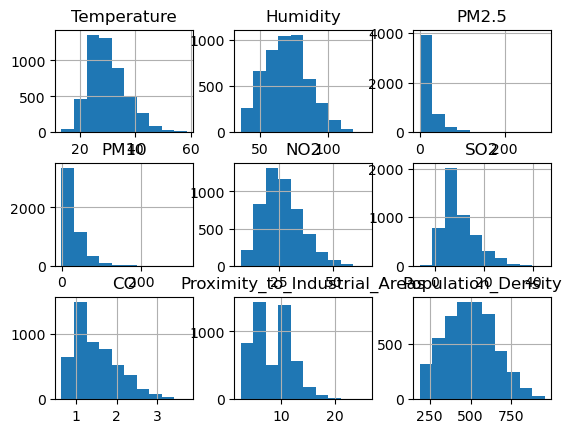

In [475]:
df_copy.hist()

<Axes: xlabel='Air Quality', ylabel='count'>

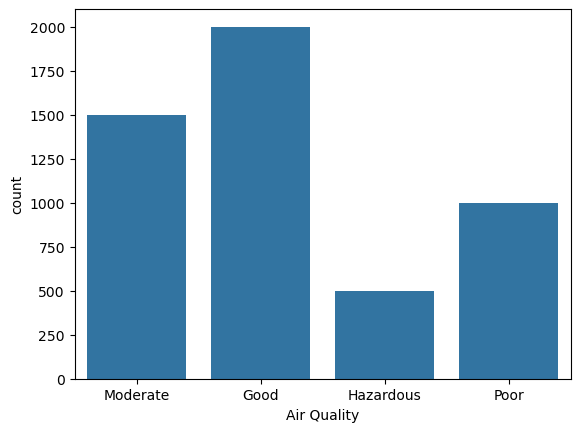

In [476]:
sns.countplot(df, x="Air Quality")

In [477]:
encoder = LabelEncoder()
df_copy['Air Quality'] = encoder.fit_transform(df_copy['Air Quality'])

In [478]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 371.2 KB


In [479]:
X = df_copy.drop('Air Quality', axis=1)
Y = df_copy['Air Quality']

In [480]:
Y = to_categorical(Y, num_classes=4)

In [481]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [482]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [483]:
scaler2 = MinMaxScaler()
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

In [484]:
# columns_to_use = ['PM2.5', 'PM10']
# data = df_copy[columns_to_use]

In [485]:
# pca = PCA(n_components=1)  
# principal_component = pca.fit_transform(data)

In [486]:
# df_copy['PCA_Component'] = principal_component

In [487]:
df_copy['Air Quality'].unique()

array([2, 0, 1, 3])

MODEL 1

In [489]:
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, kernel_initializer="uniform", activation="relu"),
    Dense(4, kernel_initializer="uniform", activation="softmax"),
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['f1_score'])

In [490]:
model1.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_97 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 900 (3.52 KB)

 Trainable params: 900 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

In [491]:
history1 = model1.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.2921 - loss: 1.3533 - val_f1_score: 0.2351 - val_loss: 1.1787
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.3649 - loss: 1.0733 - val_f1_score: 0.5837 - val_loss: 0.8216
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.6110 - loss: 0.7518 - val_f1_score: 0.5831 - val_loss: 0.6365
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.6101 - loss: 0.5872 - val_f1_score: 0.6684 - val_loss: 0.5248
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.7125 - loss: 0.5034 - val_f1_score: 0.7115 - val_loss: 0.4532
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.8237 - loss: 0.4138 - val_f1_score: 0.8207 - val_loss: 0.4007
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.8706 - loss: 0.3798 - val_f1_score: 0.8290 - val_loss: 0.3646
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.8867 - loss: 0.3345 - val_f1_score: 0.

In [492]:
y_pred = model1.predict(X_test).round()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [493]:
f1_score = model1.evaluate(X_test, Y_test)
f1_score

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.9081 - loss: 0.1750 


[0.1807205229997635,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.99877894, 0.847619  , 0.9470085 , 0.8393781 ], dtype=float32)>]

In [494]:
predictions = model1.predict(X_test)
predictions[:5]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[4.5439034e-21, 9.6535069e-01, 3.1911881e-07, 3.4648988e-02],
       [9.9521279e-01, 5.6544870e-14, 4.7870860e-03, 7.1586186e-08],
       [1.3958348e-01, 2.2283727e-08, 8.5939962e-01, 1.0168339e-03],
       [3.8487662e-17, 7.7567726e-01, 2.7023218e-05, 2.2429577e-01],
       [9.9900949e-01, 1.0324648e-15, 9.9045399e-04, 3.8439794e-09]],
      dtype=float32)

In [495]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.90      0.80      0.85       111
           2       0.95      0.94      0.95       294
           3       0.81      0.87      0.84       186

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.91      0.90      0.91      1000
weighted avg       0.94      0.94      0.94      1000
 samples avg       0.94      0.94      0.94      1000



MODEL 2

In [497]:
model2 = Sequential([
     Input(shape=(X.shape[1],)),
    Dense(128, kernel_initializer="he_normal", activation="relu"),
    Dropout(0.3),
    Dense(64, kernel_initializer="he_normal", activation="relu"),
    Dropout(0.3),
    Dense(32, kernel_initializer="he_normal", activation="relu"),
    Dense(4, kernel_initializer="he_normal", activation="softmax"),
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['f1_score'])

In [498]:
model2.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                     │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,748 (45.89 KB)

 Trainable params: 11,748 (45.89 KB)

 Non-trainable params: 0 (0.00 B)

In [499]:
history2 = model2.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.3664 - loss: 1.2461 - val_f1_score: 0.6196 - val_loss: 0.6174
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.6215 - loss: 0.6485 - val_f1_score: 0.7573 - val_loss: 0.4463
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.6832 - loss: 0.5109 - val_f1_score: 0.7694 - val_loss: 0.3886
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.7398 - loss: 0.4296 - val_f1_score: 0.7775 - val_loss: 0.3652
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.7722 - loss: 0.4079 - val_f1_score: 0.7983 - val_loss: 0.3286
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.7817 - loss: 0.3820 - val_f1_score: 0.7883 - val_loss: 0.3232
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.7993 - loss: 0.3429 - val_f1_score: 0.8435 - val_loss: 0.2855
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.8111 - loss: 0.3253 - val_f1_score: 0.

In [500]:
y_pred = model2.predict(X_test).round()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [501]:
f1_score = model2.evaluate(X_test, Y_test)
f1_score

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.9136 - loss: 0.1324


[0.14214792847633362,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.99877894, 0.8516746 , 0.9520661 , 0.839237  ], dtype=float32)>]

In [502]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.91      0.80      0.85       111
           2       0.93      0.98      0.95       294
           3       0.85      0.83      0.84       186

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.92      0.90      0.91      1000
weighted avg       0.94      0.94      0.94      1000
 samples avg       0.94      0.94      0.94      1000



MODEL 3

In [596]:
model3 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, kernel_initializer="glorot_uniform", activation="tanh"),
    BatchNormalization(),
    Dense(64, kernel_initializer="glorot_uniform", activation="tanh"),
    Dense(4, kernel_initializer="glorot_uniform", activation="softmax"),
])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['f1_score'])

In [598]:
model3.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_113 (Dense)                    │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,308 (40.27 KB)

 Trainable params: 10,052 (39.27 KB)

 Non-trainable params: 256 (1.00 KB)

In [600]:
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights based on class labels
sample_weights = compute_sample_weight(class_weight='balanced', y=Y_train)

In [602]:
history3 = model3.fit(X_train, Y_train, epochs=30, batch_size=32, sample_weight=sample_weights, validation_split=0.2)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - f1_score: 0.6015 - loss: 0.5224 - val_f1_score: 0.1742 - val_loss: 0.8019
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.7627 - loss: 0.3105 - val_f1_score: 0.1124 - val_loss: 1.4182
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.8018 - loss: 0.2761 - val_f1_score: 0.1159 - val_loss: 1.7637
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.8294 - loss: 0.2176 - val_f1_score: 0.1490 - val_loss: 1.8813
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.8319 - loss: 0.2418 - val_f1_score: 0.3223 - val_loss: 1.1767
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.8414 - loss: 0.2201 - val_f1_score: 0.4555 - val_loss: 0.9875
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.8411 - loss: 0.2144 - val_f1_score: 0.4995 - val_loss: 0.9311
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.8743 - loss: 0.1808 - val_f1_score: 0.

In [603]:
y_pred = model3.predict(X_test).round()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [604]:
f1_score = model3.evaluate(X_test, Y_test)
f1_score

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.8886 - loss: 0.1726


[0.16632570326328278,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.99877894, 0.8444444 , 0.94634145, 0.803519  ], dtype=float32)>]

In [605]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.86      0.86      0.86       111
           2       0.91      0.99      0.95       294
           3       0.88      0.73      0.80       186

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.93      0.93      0.93      1000
 samples avg       0.93      0.93      0.93      1000



C:\Users\Gjurgjica Mladenova\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

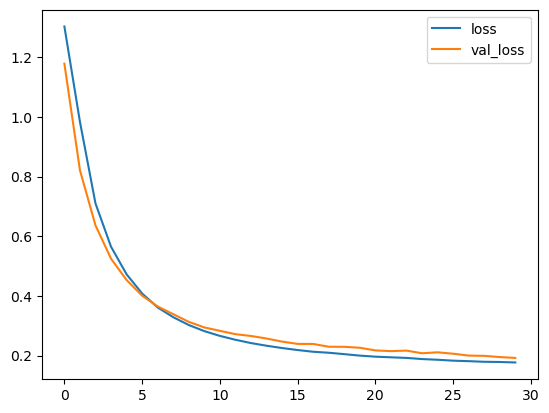

In [606]:
sns.lineplot(history1.history['loss'], label='loss')
sns.lineplot(history1.history['val_loss'], label='val_loss')

<Axes: >

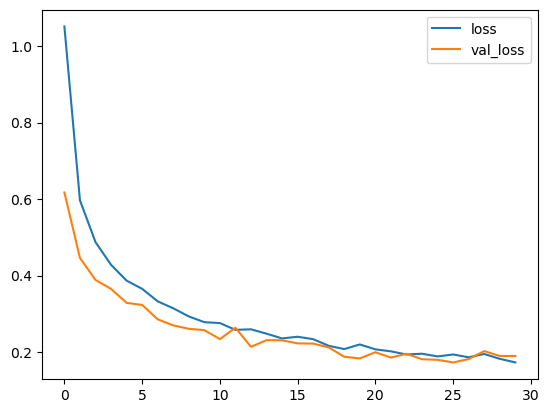

In [607]:
sns.lineplot(history2.history['loss'], label='loss')
sns.lineplot(history2.history['val_loss'], label='val_loss')

<Axes: >

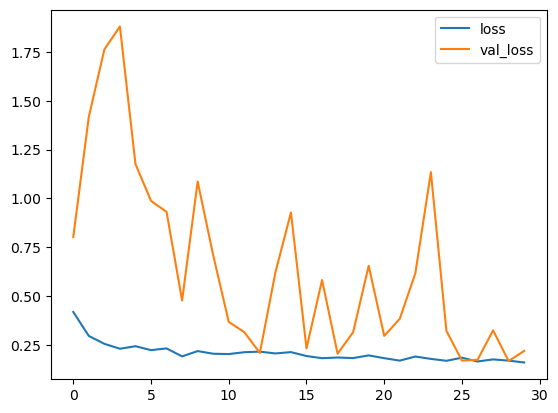

In [608]:
sns.lineplot(history3.history['loss'], label='loss')
sns.lineplot(history3.history['val_loss'], label='val_loss')